<a href="https://colab.research.google.com/github/ishit-k9/Anomaly-Detection/blob/main/Smart_Loan_Recovery_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **SMART LOAN RECOVERY SYSTEM**

---



* A Smart Loan Recovery System is a data-driven approach to manage and optimize the process of recovering outstanding loans.
* Predict borrowers' behaviour.
* Gives personalize recovery strategies.
* Maximize loan repayments.

**FRAMING THE PROBLEM**

* We've given a dataset of 500 people and we have to segement user behaviour, understanding payment delays, thier monthly income, loan amount and other factors and based on these factors we're going to predict what recovery strategies should we use to each individual person in order to recover loan amount

**METRICS USED**

* Since we are working on unlabelled data, we're going to cluster and then do prediction.

# **START**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/New ML projects /loan-recovery.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,Home,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,Auto,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,Home,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,Home,1.145493e+06,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,Personal,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BRW_496,46,Female,Salaried,248483,1,LN_496,740796,72,16.59,Personal,0.000000e+00,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No
496,BRW_497,30,Female,Salaried,243590,3,LN_497,1408126,60,11.03,Personal,0.000000e+00,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No
497,BRW_498,46,Female,Salaried,113864,2,LN_498,375203,48,9.16,Personal,0.000000e+00,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No
498,BRW_499,54,Male,Salaried,158401,2,LN_499,1769890,24,11.19,Auto,1.272774e+06,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [ ]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


# **Exploratory Data Analysis**

## **Uni-Variate Analysis**

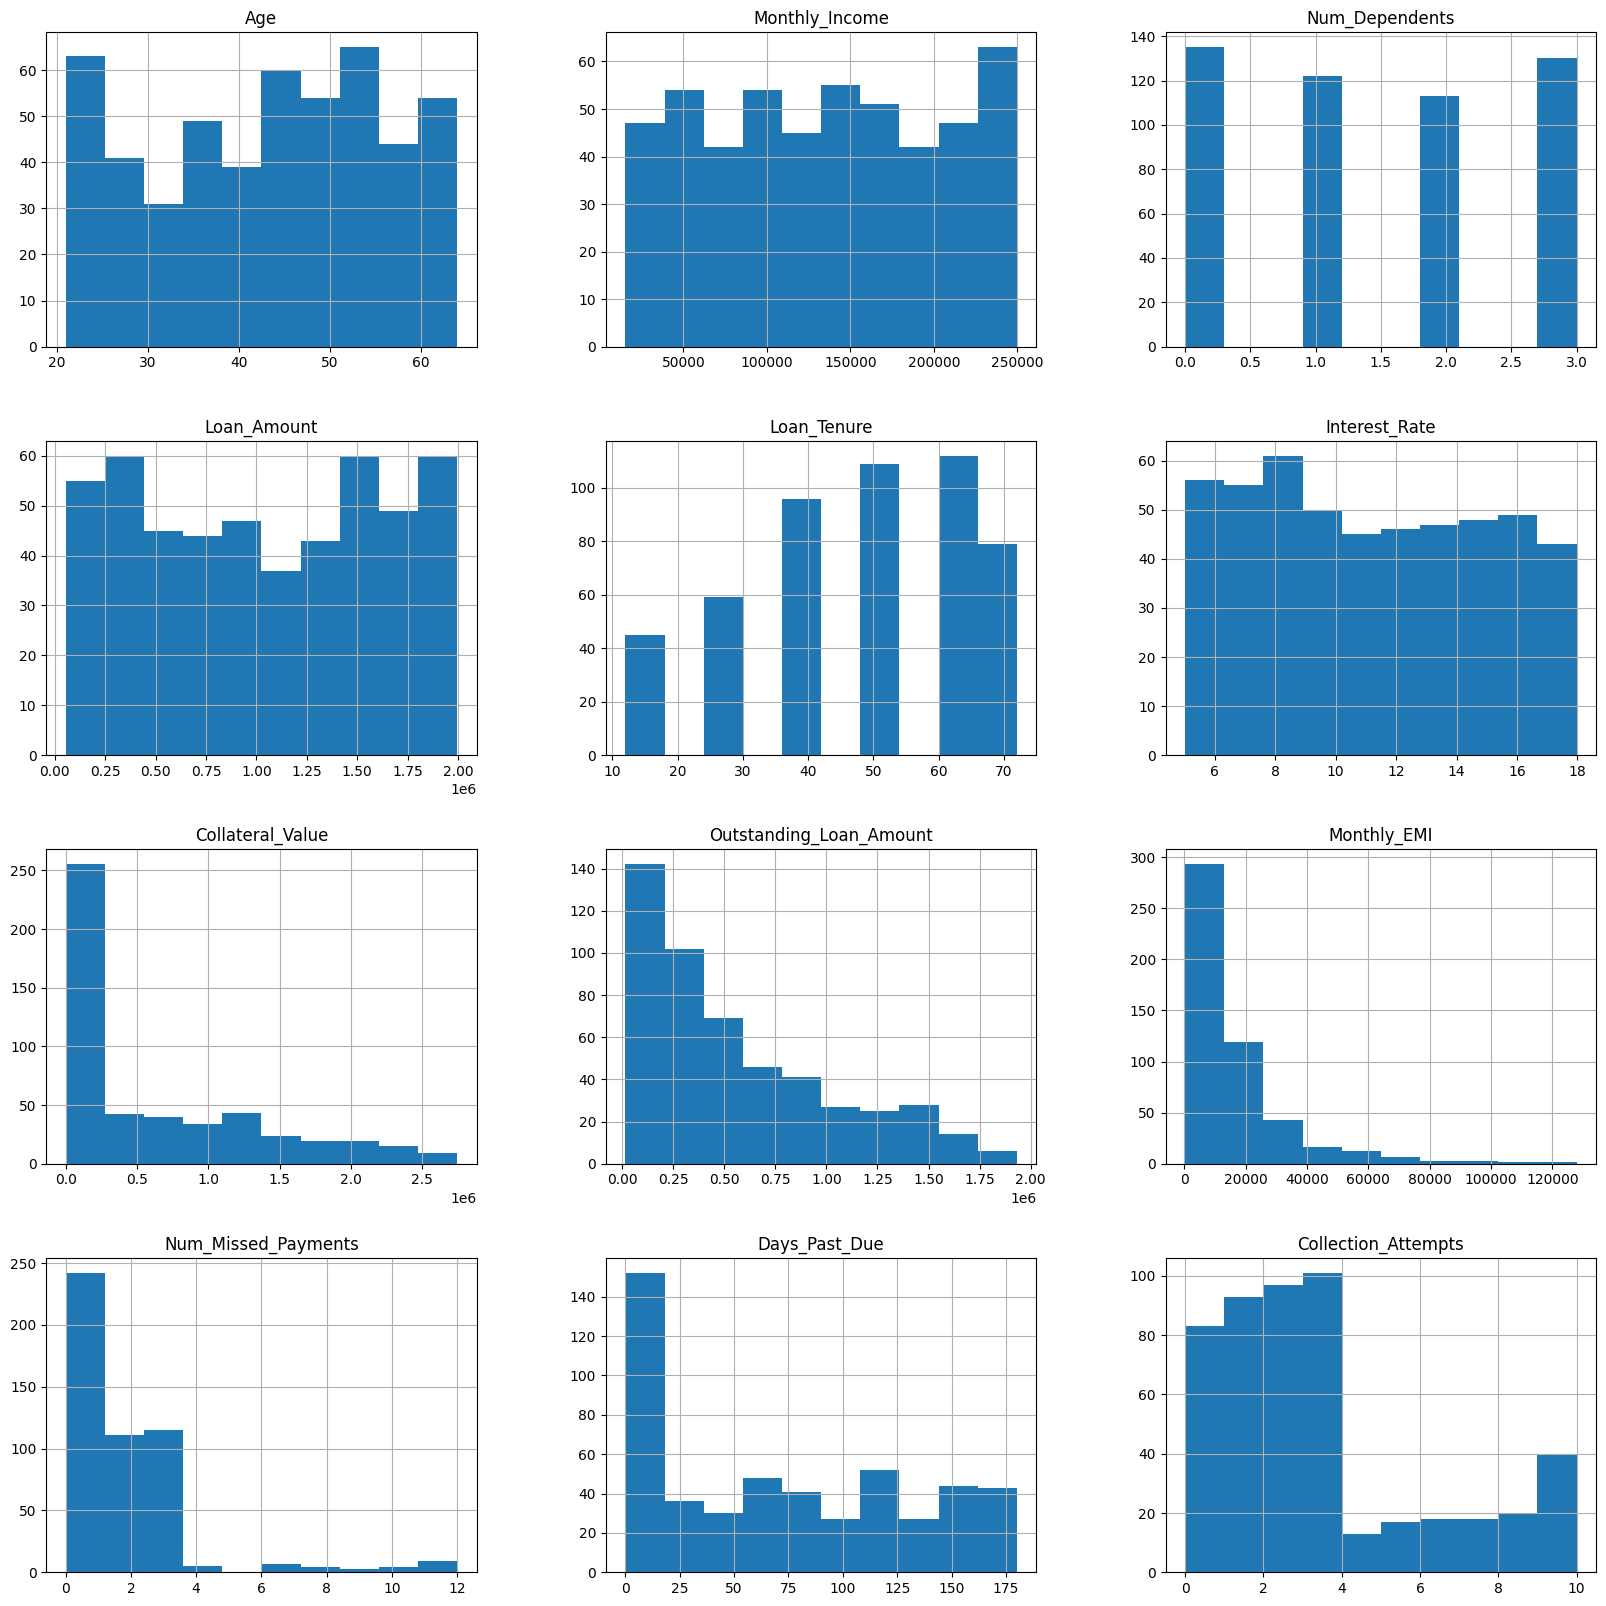

In [ ]:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
[i for i in df.columns if df[i].dtype == object]
x = [ 'Gender','Loan_Type', 'Payment_History',
 'Recovery_Status',
 'Collection_Method',
 'Legal_Action_Taken']

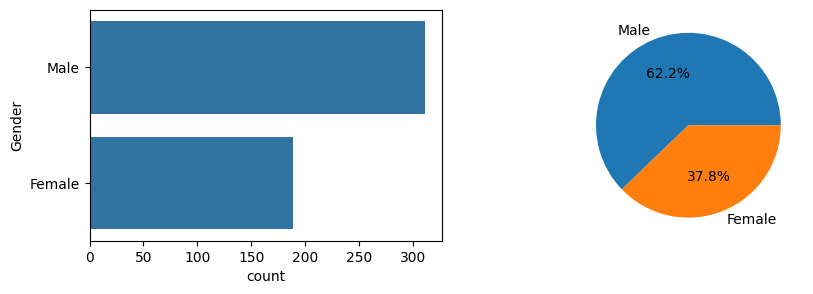

<Figure size 640x480 with 0 Axes>

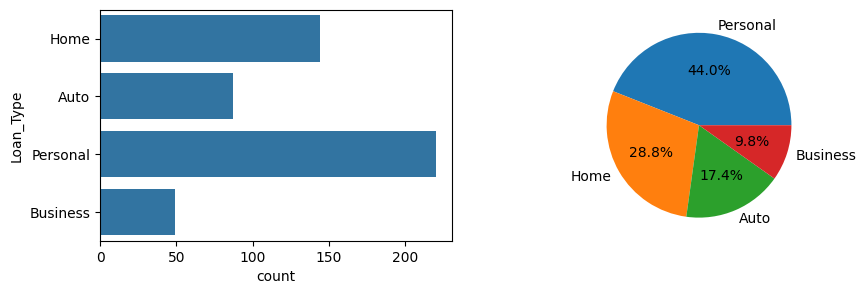

<Figure size 640x480 with 0 Axes>

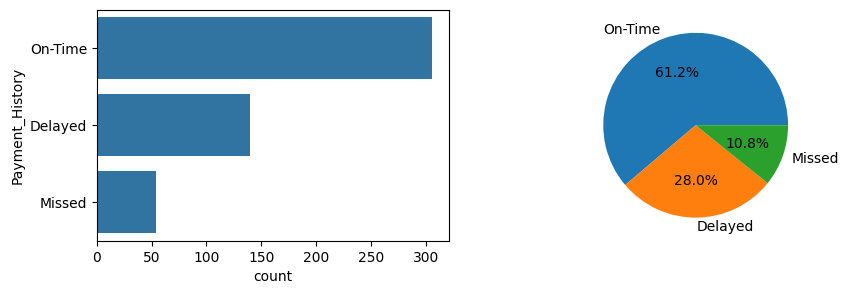

<Figure size 640x480 with 0 Axes>

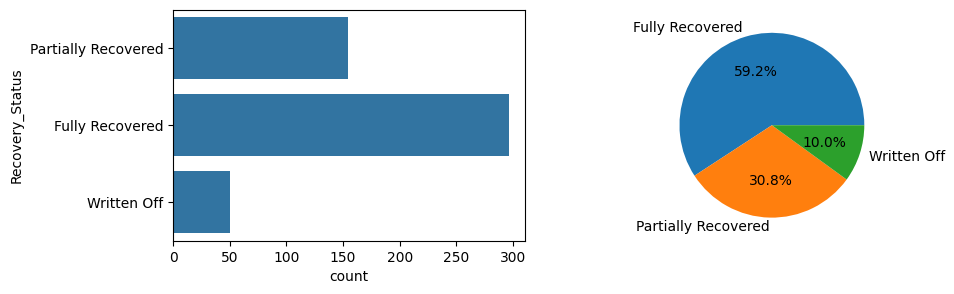

<Figure size 640x480 with 0 Axes>

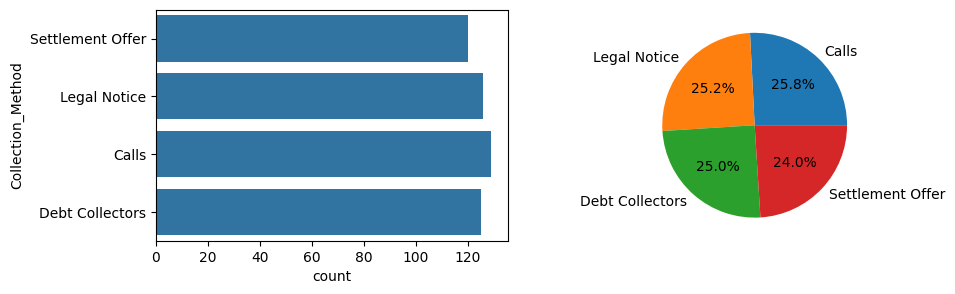

<Figure size 640x480 with 0 Axes>

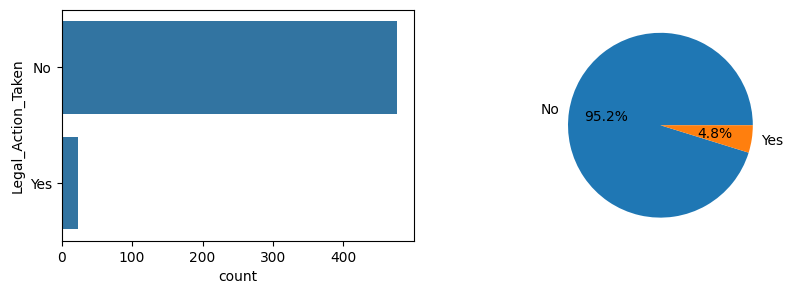

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in x :
      fig, ax = plt.subplots(1,2, figsize = (10,3))
      sns.countplot(y= df[i], ax = ax[0])
      bins = df[i].value_counts()/ df.shape[0] *100
      ax[1].pie(bins , labels = bins.index, autopct = '%0.1f%%')
      plt.show()
      plt.tight_layout()

## **Multi-Variate Analysis**

Text(0.5, 1.0, 'Loan Amount v/s Monthly Income')

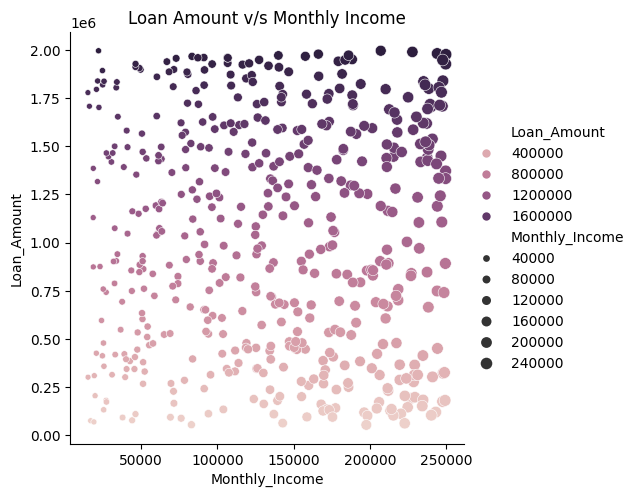

In [ ]:
sns.relplot(data=df , x = 'Monthly_Income', y = 'Loan_Amount', size = 'Monthly_Income', hue ='Loan_Amount')
plt.title('Loan Amount v/s Monthly Income')

High Loan amount has high monthly income.

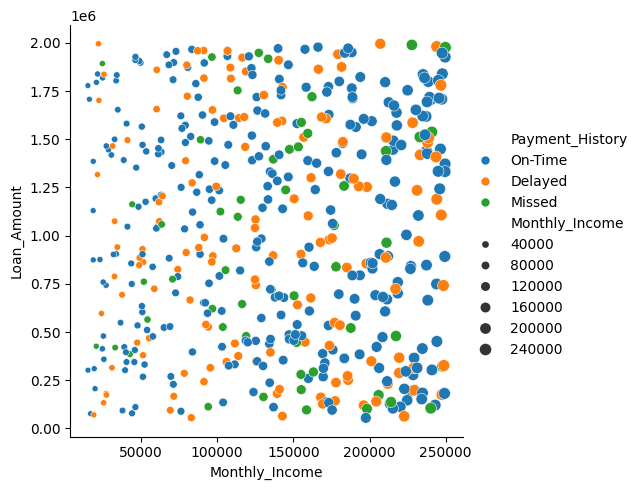

In [ ]:
sns.relplot(data=df , x = 'Monthly_Income', y = 'Loan_Amount', size = 'Monthly_Income', hue ='Payment_History')

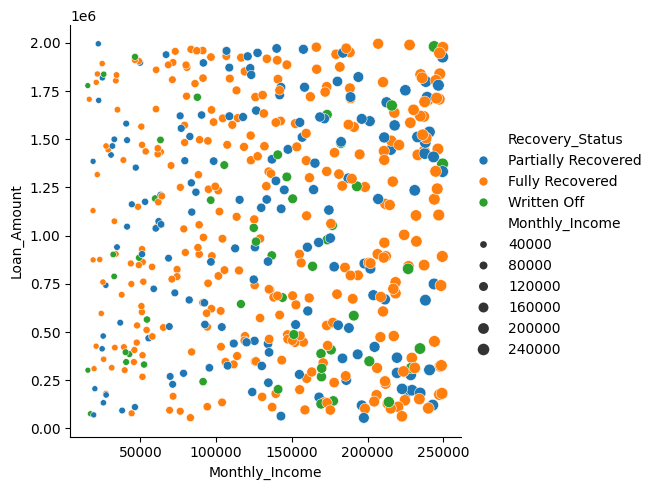

In [ ]:
sns.relplot(data=df , x = 'Monthly_Income', y = 'Loan_Amount', size = 'Monthly_Income', hue ='Recovery_Status')

In [ ]:
df[df['Recovery_Status'] == 'Written Off']['Employment_Type'].value_counts()

,count
Employment_Type,
Salaried,30
Self-Employed,16
Business Owner,4


* Salaried people are tend to have more written off the loan than any other employment type.
*Out of all written off people 60% are salaried.

In [ ]:
df[df['Monthly_Income'] < df['Monthly_Income'].mean()]

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,Loan_Type,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,Auto,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,Home,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,Personal,0.000000e+00,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
6,BRW_7,59,Female,Self-Employed,82649,1,LN_7,1514110,60,17.06,Home,1.639219e+06,8.754904e+05,14591.51,On-Time,0,0,Partially Recovered,8,Debt Collectors,No
7,BRW_8,39,Male,Salaried,79674,0,LN_8,912147,12,9.76,Personal,0.000000e+00,4.161214e+05,34676.78,Delayed,0,0,Fully Recovered,0,Settlement Offer,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,BRW_489,22,Male,Self-Employed,80450,0,LN_489,1723200,60,6.79,Auto,1.928613e+06,1.533515e+06,25558.59,Delayed,1,84,Fully Recovered,0,Legal Notice,No
489,BRW_490,55,Male,Self-Employed,25382,0,LN_490,478745,24,6.05,Business,4.693110e+05,8.646586e+04,3602.74,On-Time,3,105,Partially Recovered,6,Calls,No
494,BRW_495,49,Female,Salaried,76929,0,LN_495,1556242,24,5.86,Personal,0.000000e+00,1.659774e+05,6915.73,On-Time,0,0,Partially Recovered,1,Debt Collectors,No
497,BRW_498,46,Female,Salaried,113864,2,LN_498,375203,48,9.16,Personal,0.000000e+00,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No


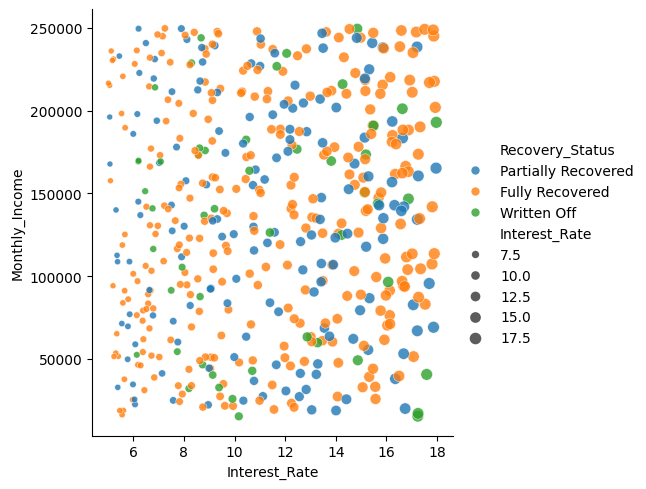

In [ ]:
sns.relplot(x = df['Interest_Rate'], y = df['Monthly_Income'],
            size = df['Interest_Rate'], hue = df['Recovery_Status'], alpha = 0.8)

* **Performing a statistical test**

In [ ]:
writtenoff = df[df['Recovery_Status'] == 'Written Off']['Interest_Rate']
partial = df[df['Recovery_Status'] == 'Partially REcovered']['Interest_Rate']
fully = df[df['Recovery_Status'] == 'Fully Recovered']['Interest_Rate']

Ho : There is no significance difference between interest rate of all recovery type.

Ha : There is a significance difference.

In [ ]:
fstats , pvalue = st.f_oneway(writtenoff, partial, fully)
print(f"ANOVA F-statistic: {fstats}")
print(f"ANOVA p-value: {pvalue}")

ANOVA F-statistic: nan
ANOVA p-value: nan


<ipython-input-77-4683611ecdcb>:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  fstats , pvalue = st.f_oneway(writtenoff, partial, fully)


<Axes: xlabel='Payment_History', ylabel='Interest_Rate'>

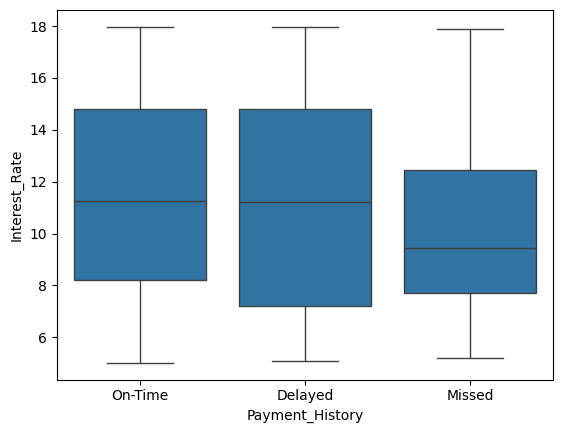

In [ ]:
sns.boxplot(x =df['Payment_History'], y = df['Interest_Rate'])

Write off might be associted with lower outstandng loan amount.

<Axes: xlabel='Payment_History', ylabel='Count'>

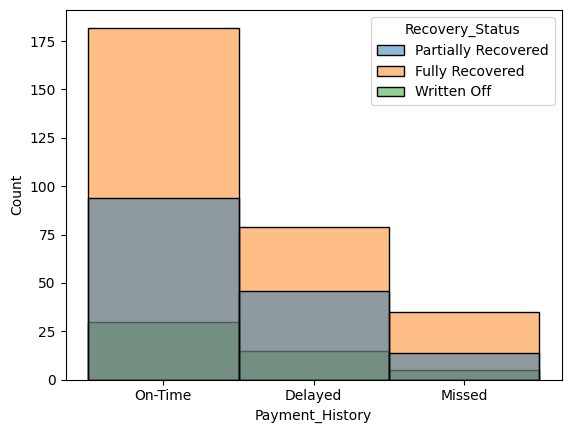

In [ ]:
sns.histplot(data = df, x = 'Payment_History', hue =df['Recovery_Status'] )

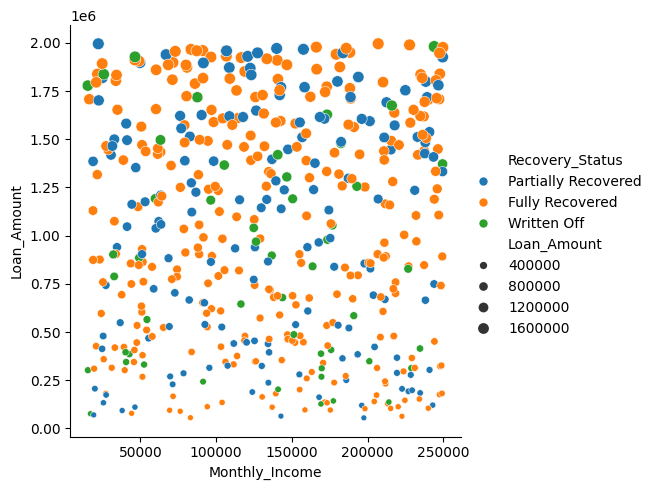

In [ ]:
sns.relplot(x = df['Monthly_Income'], y = df['Loan_Amount'],
                hue = df['Recovery_Status'], size = df['Loan_Amount'])

# **Borrower Segement**

In [ ]:
features = ['Age',
 'Monthly_Income',
 'Loan_Amount',
 'Loan_Tenure',
 'Interest_Rate',
 'Collateral_Value',
 'Outstanding_Loan_Amount',
 'Monthly_EMI',
 'Num_Missed_Payments',
 'Days_Past_Due']

scaled = StandardScaler().fit_transform(df[features])

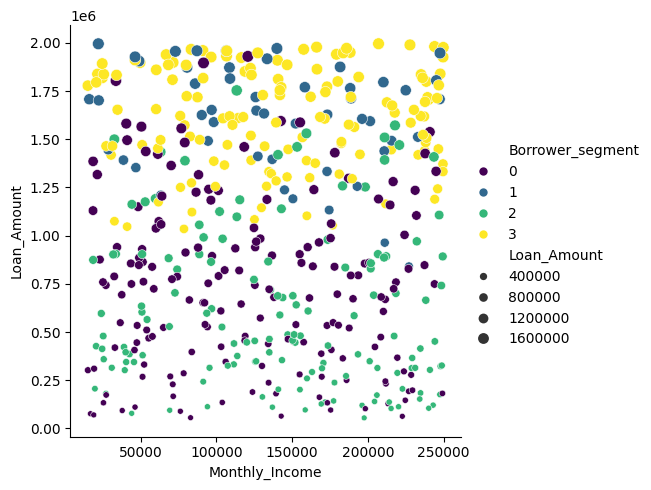

In [ ]:
km = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Borrower_segment'] = km.fit_predict(scaled)
sns.relplot(data = df, x = 'Monthly_Income', y = 'Loan_Amount', hue = 'Borrower_segment',
            size = 'Loan_Amount', palette='viridis')

Higher loan amounts are clustered in specific income group.

In [ ]:
df['segement_name'] = df['Borrower_segment'].map({
    0: 'Moderate Income, High Loan Burden',
    1: 'High Income, Low Default Risk',
    2: 'Moderate Income, Medium  Risk',
    3: 'High loans, High Default Risk'
})

df['High_risk'] = df['segement_name'].apply(lambda x : 1 if x in ['Moderate Income, High Loan Burden',
                                                                  'High loans, High Default Risk'] else 0)

# **Building a ML Model**

In [ ]:
X = df[features]
y = df['High_risk']

xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)

In [ ]:
rf = RandomForestClassifier(n_estimators=60, max_depth=9)
rf.fit(xtrain, ytrain)
risk_probs = rf.predict_proba(xtest)[:,1]

In [ ]:
testcopy = xtest.copy()
testcopy['risk_score'] = risk_probs
testcopy['predicted_high_risk'] = (testcopy['risk_score'] > 0.75).astype(int)
testcopy = testcopy.merge(df[['Borrower_ID', 'segement_name', 'Recovery_Status', 'Collection_Method',
                              'Collection_Attempts', 'Legal_Action_Taken']], left_index = True, right_index = True)

In [ ]:
def labels(x):
  if x > 0.75:
    return "Immediate legal notice & aggressive recovery attempts"
  elif 0.50<= x <= 0.75:
    return "Settlement offer, repayment plans"
  else:
    return "Automated Reminders and Monitoring"

testcopy['Recovery Strategies'] = testcopy['risk_score'].apply(labels)

In [ ]:
testcopy.sample(5)

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,risk_score,predicted_high_risk,Borrower_ID,segement_name,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery Strategies
185,52,155180,200653,24,14.75,0.000000e+00,1.171024e+05,4879.27,6,86,0.083333,0,BRW_186,"Moderate Income, Medium Risk",Fully Recovered,Settlement Offer,1,No,Automated Reminders and Monitoring
323,26,80681,1872744,24,12.12,2.226338e+06,9.461340e+05,39422.25,0,0,0.333333,0,BRW_324,"High Income, Low Default Risk",Fully Recovered,Legal Notice,2,No,Automated Reminders and Monitoring
86,21,161470,676256,36,14.54,0.000000e+00,3.158796e+05,8774.43,1,55,0.938964,1,BRW_87,"Moderate Income, High Loan Burden",Fully Recovered,Calls,2,No,Immediate legal notice & aggressive recovery a...
472,53,50585,1565331,48,9.20,0.000000e+00,1.674747e+05,3489.06,2,46,0.950000,1,BRW_473,"Moderate Income, High Loan Burden",Fully Recovered,Calls,1,No,Immediate legal notice & aggressive recovery a...
209,52,46348,1911057,60,6.19,2.327539e+06,1.886640e+06,31444.00,0,0,0.816667,1,BRW_210,"High loans, High Default Risk",Fully Recovered,Settlement Offer,2,No,Immediate legal notice & aggressive recovery a...
